In [1]:
import numpy as np
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Scikit-Learn version:', sklearn.__version__)

Numpy version: 1.26.4
Pandas version: 2.2.2
Scikit-Learn version: 1.5.2


#LOAD DATA

In [3]:
data = pd.read_csv('medcost.csv')

In [4]:
df=data

In [5]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Check for missing values
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


#visualize the data

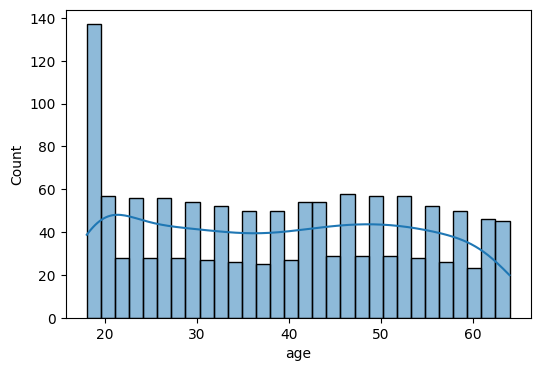

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

#draw histplot for age
plt.figure(figsize=(6, 4))
sns.histplot(data['age'], bins=30, kde=True)
plt.show()

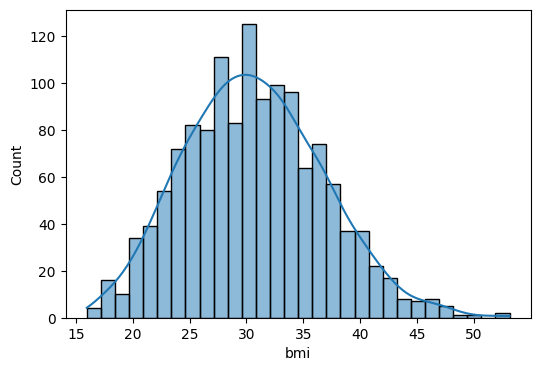

In [10]:
#draw histplot for bmi
plt.figure(figsize=(6, 4))
sns.histplot(data['bmi'], bins=30, kde=True)
plt.show()

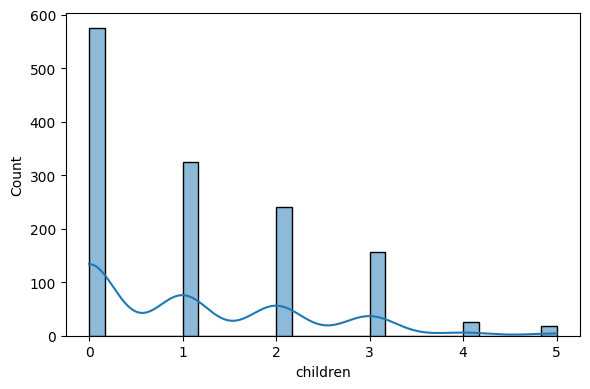

In [11]:
#draw histplot for children
plt.figure(figsize=(6, 4))
sns.histplot(data['children'], bins=30, kde=True)
plt.tight_layout()
plt.show()

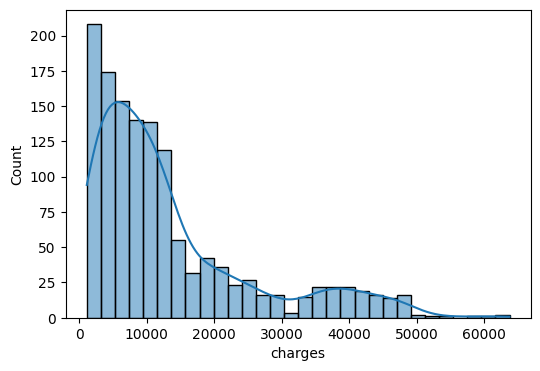

In [12]:
#draw histplot for charges
plt.figure(figsize=(6, 4))
sns.histplot(data['charges'], bins=30, kde=True)
plt.show()

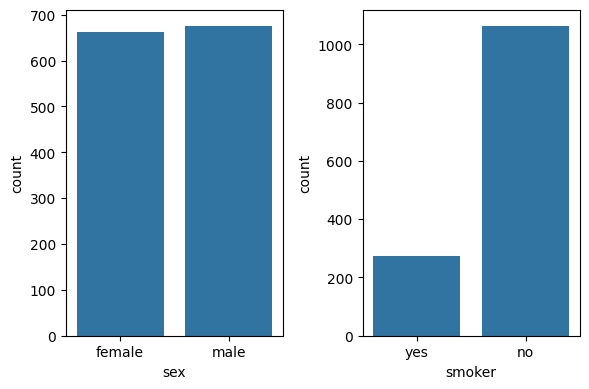

In [13]:
# Bar Plot for Categorical Variables
fig, axs = plt.subplots(1, 2, figsize=(6, 4))
sns.countplot(x='sex', data=df, ax=axs[ 0])
sns.countplot(x='smoker', data=df, ax=axs[1])
plt.tight_layout()
plt.show()

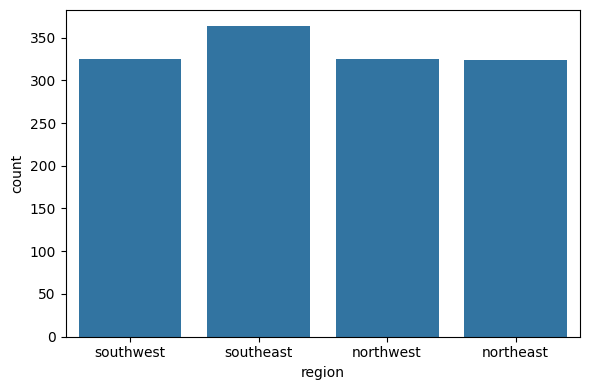

In [14]:
plt.figure(figsize=(6, 4))

# Create a bar plot for 'region'
sns.countplot(x='region', data=df)
plt.tight_layout()
plt.show()

#Handling Outliers

<Axes: xlabel='age'>

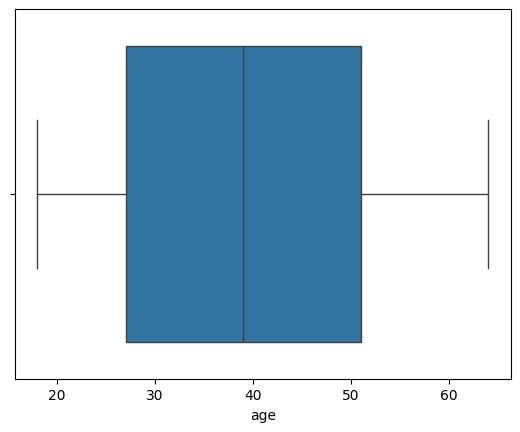

In [15]:
sns.boxplot(x=data['age'])

<Axes: ylabel='bmi'>

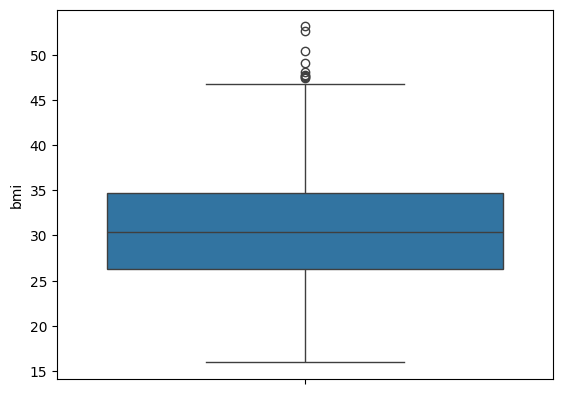

In [16]:
sns.boxplot(df['bmi'])

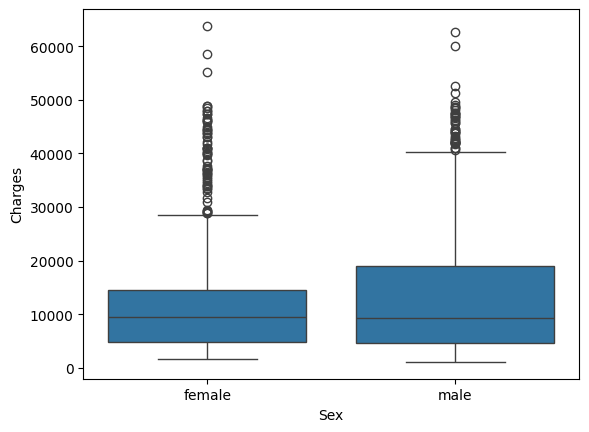

In [17]:
# Charges by sex
sns.boxplot(x='sex', y='charges', data=data)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

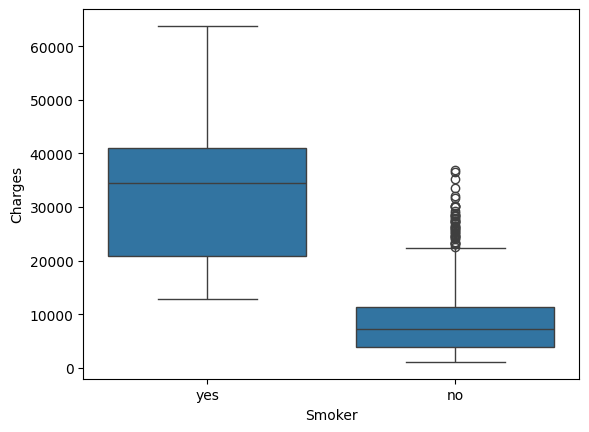

In [18]:
# Charges by smoking status
sns.boxplot(x='smoker', y='charges', data=data)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

In [19]:
#IQR METHOD IN BMI
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
data = data[(data['bmi'] >= (Q1 - 1.5 * IQR)) & (data['bmi'] <= (Q3 + 1.5 * IQR))]
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#Check for multicollinearity

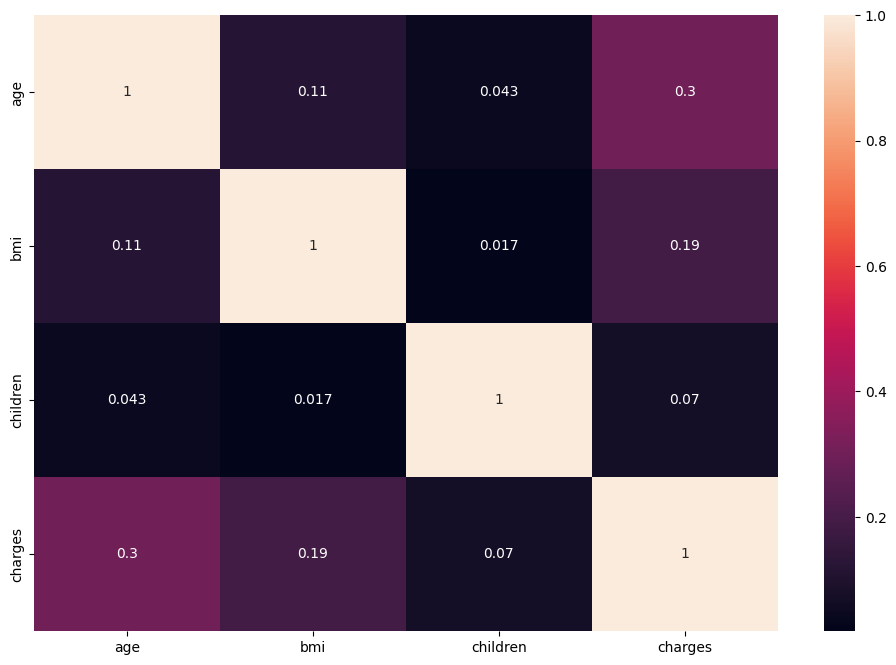

In [20]:
# draw correlation plot
plt.figure(figsize=(12,8))
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number']) #creates a new DataFrame numerical_data containing only columns with numerical data types because of the corr() function only operates on numerical data, avoiding the error.
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

#FEATURE ENCODING

In [21]:
# perform feature encoding on categorical variables using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# label encode smoker region and sex .
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df['sex'] = le.fit_transform(df['sex'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [22]:
# scale charges using min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['charges'] = scaler.fit_transform(df['charges'].values.reshape(-1,1))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,0.251611
1,18,1,33.770,1,0,2,0.009636
2,28,1,33.000,3,0,2,0.053115
3,33,1,22.705,0,0,1,0.333010
4,32,1,28.880,0,0,1,0.043816


#Splitting dataset into Train and test

In [23]:
# Define features and target
X = df.drop('charges', axis=1)
y = df['charges']

In [24]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


#MODEL TRAINING AND EVALUATION

##LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)
y_pred

array([ 1.24544508e-01,  9.56833115e-02,  5.71236482e-01,  1.33857851e-01,
        4.13281304e-01,  1.54335655e-01, -1.42952294e-02,  2.52533236e-01,
       -1.04141439e-03,  1.61951799e-01,  4.29805993e-01,  1.32524836e-01,
        6.71116593e-02,  5.95994382e-01,  6.25417979e-01,  5.75035397e-01,
        2.26119263e-01,  5.56168956e-01,  1.28611131e-01,  4.85070382e-01,
        4.27131451e-02,  1.42843746e-01,  1.90060510e-02,  9.50147959e-02,
        1.63299832e-01,  1.88127197e-01,  2.12725945e-01,  8.11477001e-02,
        1.40388467e-01,  1.78396205e-02,  1.26717702e-01,  1.91523786e-01,
        5.58006993e-02,  3.74476047e-02,  5.23695138e-02,  1.89087240e-01,
        1.28585743e-02,  1.21886997e-01,  5.14017895e-01,  5.03069919e-01,
        4.35851027e-02,  5.18531170e-02,  2.06850525e-01,  1.65315230e-01,
        1.23025784e-01,  1.74373973e-01,  6.70555182e-02,  3.15863303e-02,
        5.49489642e-01,  1.28969266e-01,  2.35797361e-01,  2.04979373e-02,
        1.79982552e-01,  

In [28]:
#check for overfit
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("Training MSE:", train_mse)
print("Training R2 Score:", train_r2)

Training MSE: 0.00949864212800409
Training R2 Score: 0.7417049283233981


In [29]:
# do cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', cv_scores)
print('Mean CV Score: ', np.mean(cv_scores))

Cross Validation Scores:  [0.71605226 0.80286251 0.72459593 0.65909301 0.76711092]
Mean CV Score:  0.73394292442297


#SUPPORT VECTOR  MACHINE


In [30]:
from sklearn.svm import SVR
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)


SVR()

In [31]:
y_pred = svm_model.predict(X_test)

In [32]:
#check for overfit
y_train_pred = svm_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("Training MSE:", train_mse)
print("Training R2 Score:", train_r2)

Training MSE: 0.022867850903858594
Training R2 Score: 0.3781581505331286


In [33]:
#check for cross validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', cv_scores)
print('Mean CV Score: ', np.mean(cv_scores))

Cross Validation Scores:  [0.29217081 0.3430712  0.3426303  0.30223977 0.33911267]
Mean CV Score:  0.3238449524307877


#RANDOM FOREST

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 0.005413625730587331
R-squared: 0.8631381923728492


In [35]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', cv_scores)
print('Mean CV Score: ', np.mean(cv_scores))

Cross Validation Scores:  [0.8168116  0.89748684 0.79538355 0.78195316 0.83687013]
Mean CV Score:  0.8257010560323487


#DECISION TREE MODEL

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
dt_model = DecisionTreeRegressor(random_state=42)

In [38]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree - MSE: {mse_dt}, R-squared: {r2_dt}")

Decision Tree - MSE: 0.010773495583966784, R-squared: 0.7276353864372422


In [39]:
# Do cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', cv_scores)
print('Mean CV Score: ', np.mean(cv_scores))

Cross Validation Scores:  [0.72529184 0.75160365 0.58869566 0.61967957 0.80307271]
Mean CV Score:  0.6976686874181317


#Hyperparameter Tunning

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the model (Random Forest)
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the tuned model
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

print("Trained MSE:", mse_rf_best)
print("Trained R-squared:", r2_rf_best)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Trained MSE: 0.004828840277812211
Trained R-squared: 0.8779221464405755


In [44]:
#model saved
import pickle

with open('modelmed.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)